# Import libraries

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


Read .csv file using python library

In [2]:
H1B_visa = pd.read_csv('C:\my files\Machine_learning_internship\Main_project\H-1B_Disclosure_Data_FY2019.csv',low_memory=False)

Check the no.of rows and columns in the csv file

In [3]:
H1B_visa.shape

(664616, 260)

Print the data using display option Onother hand, use .head for first five set or .tail for last five set of matrix data

In [4]:
H1B_visa.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
0,I-200-16092-327771,WITHDRAWN,04/08/2016,04/30/2019,NaN,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,I-203-17188-450729,WITHDRAWN,07/14/2017,05/13/2019,NaN,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,08/23/2017,04/30/2019,NaN,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,12/22/2017,08/20/2019,NaN,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,01/10/2018,04/15/2019,NaN,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis 

In VISA_CLASS, First condition has focusing H1B Visa for united states of America.
So, here drop the rows which is not belongs to H1B visa.
The following command excute  and keep necessary rows.

In [5]:
H1B_visa = H1B_visa[H1B_visa.VISA_CLASS == 'H-1B']
H1B_visa = H1B_visa[H1B_visa.EMPLOYER_COUNTRY == 'UNITED STATES OF AMERICA']
H1B_visa = H1B_visa[H1B_visa.CASE_STATUS != 'WITHDRAWN']
H1B_visa = H1B_visa[H1B_visa.CASE_STATUS != 'CERTIFIED-WITHDRAWN']


In [6]:
H1B_visa.shape

(583774, 260)

Now considering recommended features for the further EDA assessment arranging useful columns from the above conditioned data.

In [7]:
select_columns = ['CASE_STATUS','VISA_CLASS','EMPLOYER_NAME','AGENT_REPRESENTING_EMPLOYER','SECONDARY_ENTITY_1','JOB_TITLE','SOC_TITLE','SOC_CODE', 'NAICS_CODE','CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT','NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER','AMENDED_PETITION', 'H-1B_DEPENDENT', 'SUPPORT_H1B','WILLFUL_VIOLATOR','WAGE_RATE_OF_PAY_FROM_1', 'WAGE_UNIT_OF_PAY_1','TOTAL_WORKER_POSITIONS','PREVAILING_WAGE_1']
H1B_visa = H1B_visa[select_columns]

In [8]:
H1B_visa.shape

(583774, 21)

In [9]:
H1B_visa.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,SECONDARY_ENTITY_1,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,...,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1
24,CERTIFIED,H-1B,FANTUAN GROUP INC,Y,NaN,ADVERSTING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,511210.0,0,...,0.0,0,0,N,NaN,N,33.0,Hour,1.0,NaN
26,CERTIFIED,H-1B,TPUSA-FHCS,Y,NaN,ADVERTISING AND PROMOTIONS DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,56142.0,0,...,0.0,1,0,N,NaN,N,99000.0,Year,1.0,NaN
47,CERTIFIED,H-1B,UNIVERSITY OF TEXAS AT DALLAS,N,NaN,PROGRAM MANAGER I,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,611310.0,0,...,0.0,0,0,N,NaN,N,67500.0,Year,1.0,55370.0
52,CERTIFIED,H-1B,"ZENITH MEDIA SERVICES, INC.",Y,NaN,ASSOCIATE STRATEGY DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541830.0,1,...,0.0,0,0,N,NaN,N,102000.0,Year,1.0,94806.0
54,CERTIFIED,H-1B,APPLE INC.,Y,NaN,ADVERTISING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,334111.0,0,...,0.0,0,0,N,NaN,N,97781.0,Year,50.0,97781.0


In [10]:
H1B_visa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583774 entries, 24 to 664615
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CASE_STATUS                  583774 non-null  object 
 1   VISA_CLASS                   583774 non-null  object 
 2   EMPLOYER_NAME                583770 non-null  object 
 3   AGENT_REPRESENTING_EMPLOYER  583769 non-null  object 
 4   SECONDARY_ENTITY_1           534017 non-null  object 
 5   JOB_TITLE                    583774 non-null  object 
 6   SOC_TITLE                    583770 non-null  object 
 7   SOC_CODE                     583770 non-null  object 
 8   NAICS_CODE                   583773 non-null  float64
 9   CONTINUED_EMPLOYMENT         583774 non-null  object 
 10  CHANGE_PREVIOUS_EMPLOYMENT   583774 non-null  int64  
 11  NEW_CONCURRENT_EMPLOYMENT    583773 non-null  float64
 12  CHANGE_EMPLOYER              583774 non-null  int64  
 13

# Data visualisation

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

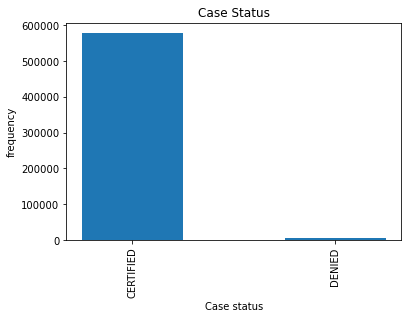

In [11]:
H1B_visa.CASE_STATUS.value_counts()
plt.bar(H1B_visa['CASE_STATUS'].value_counts().index, H1B_visa['CASE_STATUS'].value_counts(), width= 0.5, bottom=None , align='center', data=H1B_visa)
plt.title('Case Status')
plt.xlabel('Case status')
plt.ylabel('frequency')
plt.xticks(rotation='vertical')

<AxesSubplot:xlabel='JOB_TITLE'>

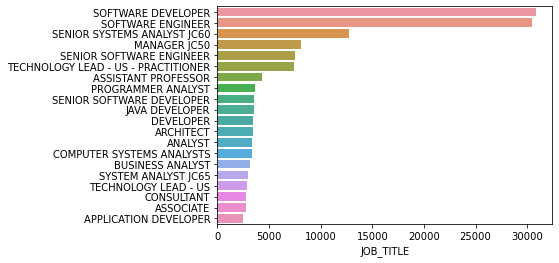

In [12]:
H1B_visa['JOB_TITLE'].value_counts()[:20]
sns.barplot(x = H1B_visa['JOB_TITLE'].value_counts()[:20], y = H1B_visa['JOB_TITLE'].value_counts().index[:20])

(array([0, 1]), [Text(0, 0, 'Y'), Text(1, 0, 'N')])

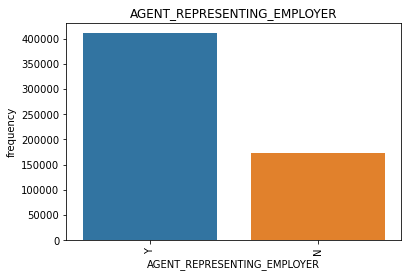

In [13]:
H1B_visa['AGENT_REPRESENTING_EMPLOYER'].value_counts()[:20]
sns.barplot(x = H1B_visa['AGENT_REPRESENTING_EMPLOYER'].value_counts().index[:20], y = H1B_visa['AGENT_REPRESENTING_EMPLOYER'].value_counts()[:20])
plt.title('AGENT_REPRESENTING_EMPLOYER')
plt.xlabel('AGENT_REPRESENTING_EMPLOYER')
plt.ylabel('frequency')
plt.xticks(rotation='vertical')

<AxesSubplot:xlabel='EMPLOYER_NAME'>

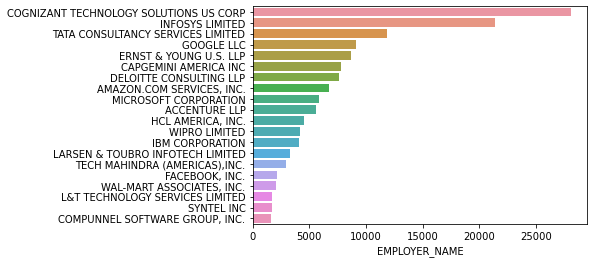

In [14]:
H1B_visa['EMPLOYER_NAME'].value_counts()
sns.barplot(x = H1B_visa['EMPLOYER_NAME'].value_counts()[:20], y = H1B_visa['EMPLOYER_NAME'].value_counts().index[:20])

In [15]:
H1B_visa.isnull().sum()

CASE_STATUS                         0
VISA_CLASS                          0
EMPLOYER_NAME                       4
AGENT_REPRESENTING_EMPLOYER         5
SECONDARY_ENTITY_1              49757
JOB_TITLE                           0
SOC_TITLE                           4
SOC_CODE                            4
NAICS_CODE                          1
CONTINUED_EMPLOYMENT                0
CHANGE_PREVIOUS_EMPLOYMENT          0
NEW_CONCURRENT_EMPLOYMENT           1
CHANGE_EMPLOYER                     0
AMENDED_PETITION                    0
H-1B_DEPENDENT                     20
SUPPORT_H1B                    365249
WILLFUL_VIOLATOR                   20
WAGE_RATE_OF_PAY_FROM_1             4
WAGE_UNIT_OF_PAY_1                  4
TOTAL_WORKER_POSITIONS              1
PREVAILING_WAGE_1                4678
dtype: int64

In [16]:
#H1B_visa['EMPLOYER_NAME'] = H1B_visa['EMPLOYER_NAME'].fillna(H1B_visa['EMPLOYER_NAME'].mode()[0])
#H1B_visa['AGENT_REPRESENTING_EMPLOYER'] = H1B_visa['AGENT_REPRESENTING_EMPLOYER'].fillna(H1B_visa['AGENT_REPRESENTING_EMPLOYER'].mode()[0])
#H1B_visa['SECONDARY_ENTITY_1'] = H1B_visa['SECONDARY_ENTITY_1'].fillna(H1B_visa['SECONDARY_ENTITY_1'].mode()[0])
#H1B_visa['SOC_CODE'] = H1B_visa['SOC_CODE'].fillna(H1B_visa['SOC_CODE'].mode()[0])
#H1B_visa['NAICS_CODE'] = H1B_visa['NAICS_CODE'].fillna(H1B_visa['NAICS_CODE'].mode()[0])
#H1B_visa['SOC_TITLE'] = H1B_visa['SOC_TITLE'].fillna(H1B_visa['SOC_TITLE'].mode()[0])
#H1B_visa['H-1B_DEPENDENT'] = H1B_visa['H-1B_DEPENDENT'].fillna(H1B_visa['H-1B_DEPENDENT'].mode()[0])
#H1B_visa['WILLFUL_VIOLATOR'] = H1B_visa['WILLFUL_VIOLATOR'].fillna(H1B_visa['WILLFUL_VIOLATOR'].mode()[0])
#H1B_visa['NEW_CONCURRENT_EMPLOYMENT'] = H1B_visa['NEW_CONCURRENT_EMPLOYMENT'].fillna(H1B_visa['NEW_CONCURRENT_EMPLOYMENT'].mode()[0])
#H1B_visa['WAGE_RATE_OF_PAY_FROM_1'] = H1B_visa['WAGE_RATE_OF_PAY_FROM_1'].fillna(H1B_visa['WAGE_RATE_OF_PAY_FROM_1'].mode()[0])
#H1B_visa['WAGE_UNIT_OF_PAY_1'] = H1B_visa['WAGE_UNIT_OF_PAY_1'].fillna(H1B_visa['WAGE_UNIT_OF_PAY_1'].mode()[0])
#H1B_visa['TOTAL_WORKER_POSITIONS'] = H1B_visa['TOTAL_WORKER_POSITIONS'].fillna(H1B_visa['TOTAL_WORKER_POSITIONS'].mode()[0])

In [17]:
H1B_visa =H1B_visa.dropna(subset = ['EMPLOYER_NAME','AGENT_REPRESENTING_EMPLOYER','SECONDARY_ENTITY_1','SOC_TITLE','SOC_CODE', 'NAICS_CODE','CONTINUED_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT', 'WILLFUL_VIOLATOR','WAGE_RATE_OF_PAY_FROM_1', 'WAGE_UNIT_OF_PAY_1','TOTAL_WORKER_POSITIONS'])


In [18]:
H1B_visa.describe()

,NAICS_CODE,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,WAGE_RATE_OF_PAY_FROM_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1
count,533985.000000,533985.000000,533985.000000,533985.000000,533985.000000,5.339850e+05,533985.000000,533985.000000
mean,451557.398698,0.115132,0.011442,0.259292,0.211300,9.335849e+04,1.602075,84020.644733
std,188768.588059,0.923191,0.172732,1.137294,0.817758,4.577030e+04,4.099092,35358.795125
min,31.000000,0.000000,0.000000,0.000000,0.000000,7.500000e+00,1.000000,7.250000
25%,454111.000000,0.000000,0.000000,0.000000,0.000000,7.342400e+04,1.000000,68786.000000
50%,541511.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+04,1.000000,83928.000000
75%,541512.000000,0.000000,0.000000,0.000000,0.000000,1.130000e+05,1.000000,101837.000000
max,928120.000000,338.000000,10.000000,54.000000,35.000000,1.870000e+06,500.000000,506424.000000


<AxesSubplot:>

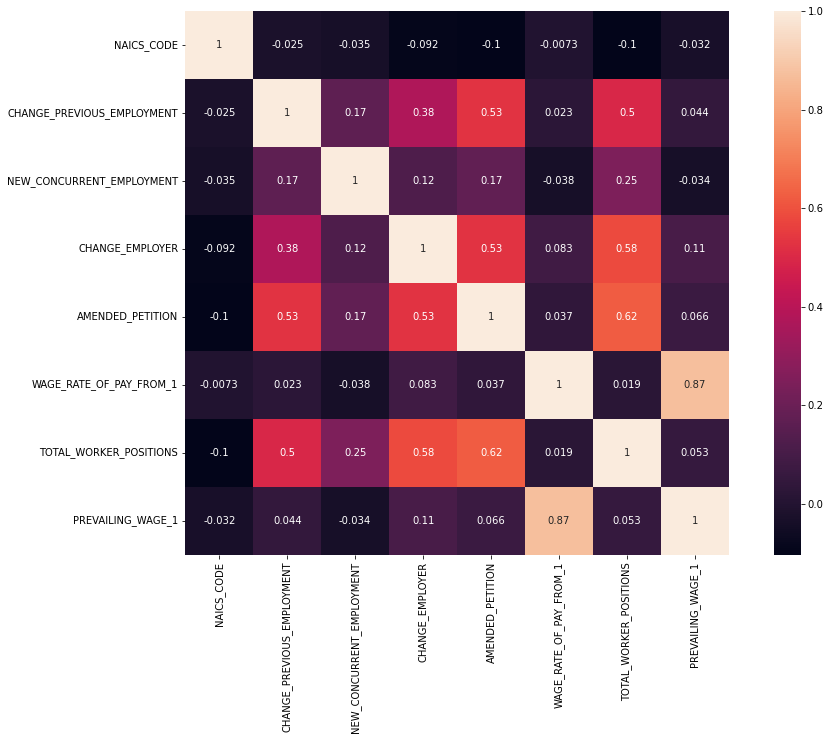

In [19]:
ax=plt.subplots(figsize=(16,10))
sns.heatmap(H1B_visa.corr(),vmax=1,square=True ,annot = True)

In [20]:
H1B_visa.isnull().sum()

CASE_STATUS                         0
VISA_CLASS                          0
EMPLOYER_NAME                       0
AGENT_REPRESENTING_EMPLOYER         0
SECONDARY_ENTITY_1                  0
JOB_TITLE                           0
SOC_TITLE                           0
SOC_CODE                            0
NAICS_CODE                          0
CONTINUED_EMPLOYMENT                0
CHANGE_PREVIOUS_EMPLOYMENT          0
NEW_CONCURRENT_EMPLOYMENT           0
CHANGE_EMPLOYER                     0
AMENDED_PETITION                    0
H-1B_DEPENDENT                      0
SUPPORT_H1B                    335440
WILLFUL_VIOLATOR                    0
WAGE_RATE_OF_PAY_FROM_1             0
WAGE_UNIT_OF_PAY_1                  0
TOTAL_WORKER_POSITIONS              0
PREVAILING_WAGE_1                   0
dtype: int64

In [21]:
H1B_visa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533985 entries, 72 to 664610
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CASE_STATUS                  533985 non-null  object 
 1   VISA_CLASS                   533985 non-null  object 
 2   EMPLOYER_NAME                533985 non-null  object 
 3   AGENT_REPRESENTING_EMPLOYER  533985 non-null  object 
 4   SECONDARY_ENTITY_1           533985 non-null  object 
 5   JOB_TITLE                    533985 non-null  object 
 6   SOC_TITLE                    533985 non-null  object 
 7   SOC_CODE                     533985 non-null  object 
 8   NAICS_CODE                   533985 non-null  float64
 9   CONTINUED_EMPLOYMENT         533985 non-null  object 
 10  CHANGE_PREVIOUS_EMPLOYMENT   533985 non-null  int64  
 11  NEW_CONCURRENT_EMPLOYMENT    533985 non-null  float64
 12  CHANGE_EMPLOYER              533985 non-null  int64  
 13

In [22]:
H1B_visa.SUPPORT_H1B.value_counts(dropna = False)

NaN    335440
Y      197127
N        1418
Name: SUPPORT_H1B, dtype: int64

In [23]:
H1B_visa.SECONDARY_ENTITY_1.value_counts(dropna = False)


N    321369
Y    212616
Name: SECONDARY_ENTITY_1, dtype: int64

In [24]:
H1B_visa.PREVAILING_WAGE_1.value_counts(dropna = False)

109242.00    7296
96366.00     6604
93538.00     4639
113318.00    4046
84240.00     3388
             ... 
37101.00        1
60681.00        1
83693.00        1
22.12           1
54837.00        1
Name: PREVAILING_WAGE_1, Length: 23517, dtype: int64

In [25]:
mode1 = H1B_visa['SUPPORT_H1B'].mode().values[0]
mode2 = H1B_visa['SECONDARY_ENTITY_1'].mode().values[0]

H1B_visa['SUPPORT_H1B'] = H1B_visa['SUPPORT_H1B'].replace(np.nan,mode1)
H1B_visa['SECONDARY_ENTITY_1'] = H1B_visa['SECONDARY_ENTITY_1'].replace(np.nan,mode2)

<AxesSubplot:>

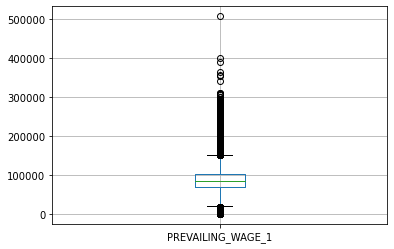

In [26]:
H1B_visa.boxplot(column='PREVAILING_WAGE_1')

<Figure size 1440x1440 with 0 Axes>

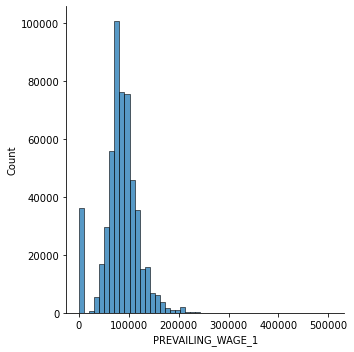

In [27]:
plt.figure(figsize=(20,20))
sns.displot(H1B_visa['PREVAILING_WAGE_1'], bins = 50)


In [28]:
q1 = H1B_visa["PREVAILING_WAGE_1"].quantile(0.1)
q3 = H1B_visa["PREVAILING_WAGE_1"].quantile(0.8)
IQR = q3 - q1
mean = H1B_visa['PREVAILING_WAGE_1'].mean()

In [29]:
H1B_visa['PREVAILING_WAGE_1'] = H1B_visa['PREVAILING_WAGE_1'].apply(lambda x: x if x != None and (x <= q1 + 1.5*IQR and x >= q1 - 1.5*IQR) else mean)

<Figure size 1440x1440 with 0 Axes>

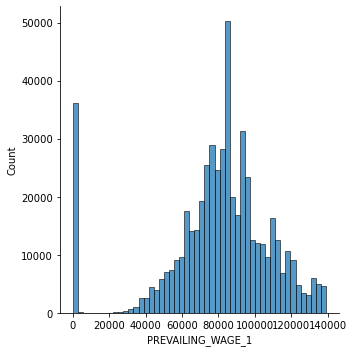

In [30]:
plt.figure(figsize=(20,20))
sns.displot(H1B_visa['PREVAILING_WAGE_1'], bins = 50)


<AxesSubplot:>

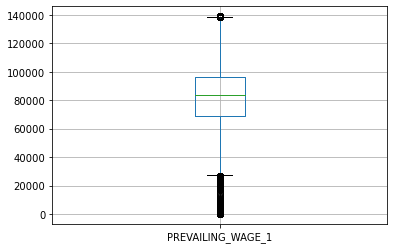

In [31]:
#H1B_visa['PREVAILING_WAGE_1']
H1B_visa.boxplot(column='PREVAILING_WAGE_1')

In [32]:
#H1B_visa = H1B_visa.drop(H1B_visa.loc[H1B_visa['PREVAILING_WAGE_1'].isnull()].index)

In [33]:
H1B_visa.isnull().sum()

CASE_STATUS                    0
VISA_CLASS                     0
EMPLOYER_NAME                  0
AGENT_REPRESENTING_EMPLOYER    0
SECONDARY_ENTITY_1             0
JOB_TITLE                      0
SOC_TITLE                      0
SOC_CODE                       0
NAICS_CODE                     0
CONTINUED_EMPLOYMENT           0
CHANGE_PREVIOUS_EMPLOYMENT     0
NEW_CONCURRENT_EMPLOYMENT      0
CHANGE_EMPLOYER                0
AMENDED_PETITION               0
H-1B_DEPENDENT                 0
SUPPORT_H1B                    0
WILLFUL_VIOLATOR               0
WAGE_RATE_OF_PAY_FROM_1        0
WAGE_UNIT_OF_PAY_1             0
TOTAL_WORKER_POSITIONS         0
PREVAILING_WAGE_1              0
dtype: int64

In [34]:
H1B_visa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533985 entries, 72 to 664610
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CASE_STATUS                  533985 non-null  object 
 1   VISA_CLASS                   533985 non-null  object 
 2   EMPLOYER_NAME                533985 non-null  object 
 3   AGENT_REPRESENTING_EMPLOYER  533985 non-null  object 
 4   SECONDARY_ENTITY_1           533985 non-null  object 
 5   JOB_TITLE                    533985 non-null  object 
 6   SOC_TITLE                    533985 non-null  object 
 7   SOC_CODE                     533985 non-null  object 
 8   NAICS_CODE                   533985 non-null  float64
 9   CONTINUED_EMPLOYMENT         533985 non-null  object 
 10  CHANGE_PREVIOUS_EMPLOYMENT   533985 non-null  int64  
 11  NEW_CONCURRENT_EMPLOYMENT    533985 non-null  float64
 12  CHANGE_EMPLOYER              533985 non-null  int64  
 13

In [35]:
duplicate =H1B_visa.duplicated()
print(duplicate.sum())
H1B_visa[duplicate]

120632


,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,SECONDARY_ENTITY_1,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,...,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1
139,CERTIFIED,H-1B,INDUSTRY CREATIVE LLC,Y,N,ACCOUNT DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541490.0,0,...,0.0,0,0,N,Y,N,90000.00,Year,1.0,75046.000000
173,CERTIFIED,H-1B,SUNGWON ANNANDALE LLC,Y,N,MARKETING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,445110.0,0,...,0.0,0,0,N,Y,N,46.00,Hour,1.0,45.240000
196,CERTIFIED,H-1B,FACEBOOK INC.,Y,N,"CREATIVE DIRECTOR, INSTAGRAM",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,518112.0,0,...,0.0,0,0,Y,Y,N,178746.72,Year,1.0,84020.644733
207,CERTIFIED,H-1B,ENERGY BBDO INC.,Y,N,ACCOUNT EXECUTIVE,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,0,...,0.0,0,0,N,Y,N,48000.00,Year,1.0,47549.000000
265,CERTIFIED,H-1B,"LAFAYETTE 148, INC.",Y,N,MERCHANDISING MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541490.0,1,...,0.0,0,0,N,Y,N,136500.00,Year,1.0,136178.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664363,CERTIFIED,H-1B,NUTRA-MED PACKAGING INC,Y,N,QUALITY ASSURANCE SUPERVISOR,FIRST-LINE SUPERVISORS OF PRODUCTION AND OPERA...,51-1011,561910.0,1,...,0.0,0,0,N,Y,N,73000.00,Year,1.0,72134.000000
664584,CERTIFIED,H-1B,"MARLIN ENGINEERING, INC.",Y,N,TRAFFIC ENGINEER,TRAFFIC TECHNICIANS,53-6041,541330.0,0,...,0.0,0,0,N,Y,N,63000.00,Year,1.0,42515.000000
664599,CERTIFIED,H-1B,"EVEREST CONSULTANTS, INC.",Y,N,MARINE CONSULTANT SURVEYOR,TRANSPORTATION INSPECTORS,53-6051,541690.0,0,...,0.0,0,0,N,Y,N,31866.00,Year,1.0,31866.000000
664603,CERTIFIED,H-1B,AMSPEC LLC,Y,N,PETROLEUM INSPECTOR,TRANSPORTATION INSPECTORS,53-6051,541380.0,1,...,0.0,0,0,N,Y,N,75000.00,Year,1.0,58011.000000


In [36]:
H1B_visa.drop_duplicates(inplace=True)

In [37]:
dpl = H1B_visa.duplicated()
dpl.sum()

0

<AxesSubplot:>

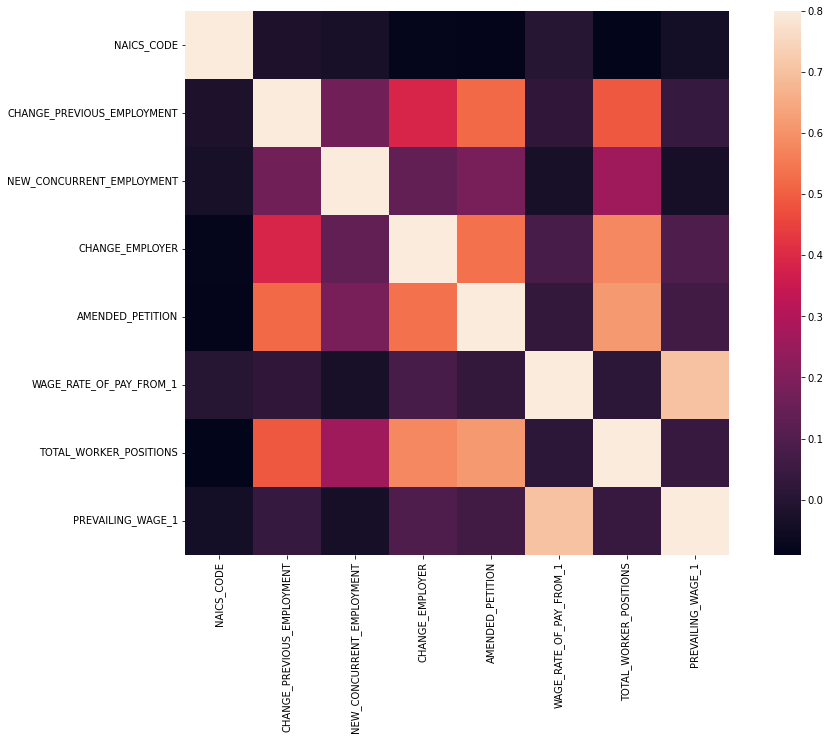

In [38]:
ax=plt.subplots(figsize=(16,10))
sns.heatmap(H1B_visa.corr(),vmax=0.8,square=True)

In [39]:
H1B_visa.EMPLOYER_NAME.value_counts()
print('EMPLOYER_NAME:\n',H1B_visa.EMPLOYER_NAME.value_counts())

EMPLOYER_NAME:
 GOOGLE LLC                                8280
INFOSYS LIMITED                           7982
ERNST & YOUNG U.S. LLP                    5568
COGNIZANT TECHNOLOGY SOLUTIONS US CORP    4241
TATA CONSULTANCY SERVICES LIMITED         4142
                                          ... 
JUST ONE DIME LLC                            1
ALASKA NATIONAL INSURANCE COMPANY            1
MVP TECHNOLOGIES LLC                         1
SKIN OPERATING, LLC                          1
WHERESCAPE USA, INC.                         1
Name: EMPLOYER_NAME, Length: 60149, dtype: int64


In [40]:
import sys
H1B_visa['EMPLOYER_BRANCH'] = 'others'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('APPLE|GOOGLE|FACEBOOK|CAPGEMINI|WIPRO|TWITTER|INFOSYS|MICROSOFT|AIRLINES|IBM|ERNST|JPMORGAN|MINDTREE|AMAZON|TATA')] = 'TOP TECH'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('ELECTRONIC|MARIX|MICRO|ELECTRO|CHIP|DEVICE|INSTRUMENTS|INTEGRATORS|DELL|HEW|SEMICONDUCTORS|ENTERTAINMENT|LOGIC')] = 'ELECTRONIC & LOGISTICS SERVICES'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('UNIVERSITY|UNIVERSITIES|ACADEMIC|INSTITUTIONS|SCIENCE|NATIONAL|SCHOOL')] = 'UNIVERSITY'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('MASTER|BANK|CARD|VISA')] = 'BANKING COMPANIES'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('HEALTH|FIN|ECLINICALWORKS|MEDTRONIC|FINANCIAL|MEDICAL|MED|CENTER')] = 'FINANCE AND MEDICAL SOLUTIONS'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('BUSINESS|MANAGEMENT')] = 'BUSINESS SOLUTIONS'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('LABS|COMMUNICATION|NETWORK|DIGITAL|NETWORKS')] = 'RESEARCH LABS & NETWORK'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('AUTOBILE|AUTOMOTIVE|MOTOR|AUTO|FORD|PUMP|ELECTRIC|TESLA|BOSCH')] = 'AUTOMOTIVE & ELECTRICAL'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('DEVELOPMENT|IT|COMPUTER|CYBER|TECHNOLOGY|TECH|SOLUTIONS|WEB|INFOTECH|CLOUD|VISION|GLOBAL|SYSTEMS|TECHNOSOFT|TECHNO|SERVICES|SECURITIES|SECURITY|TECHNOLOGIES|DATA')] = 'TECH SOLUTIONS'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('INTERNATIONAL|CONSULTING|CONSULTANT|RESOURCES|GROUP|ASSOCIATES|ANALYSTS')] = 'CONSULTING COMPANIES'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('PRODUCT|PRODUCTS|ENTERPRISE|ENTERPRISES')] = 'PRODUCT &ENTERPRISE COMPANIES'
#H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('')] = 'PRODUCT &ENTERPRISE COMPANIES'

C:\Users\User\AppData\Local\Temp\ipykernel_23760\1785688180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('APPLE|GOOGLE|FACEBOOK|CAPGEMINI|WIPRO|TWITTER|INFOSYS|MICROSOFT|AIRLINES|IBM|ERNST|JPMORGAN|MINDTREE|AMAZON|TATA')] = 'TOP TECH'
C:\Users\User\AppData\Local\Temp\ipykernel_23760\1785688180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('ELECTRONIC|MARIX|MICRO|ELECTRO|CHIP|DEVICE|INSTRUMENTS|INTEGRATORS|DELL|HEW|SEMICONDUCTORS|ENTERTAINMENT|LOGIC')] = 'ELECTRONIC & LOGISTI

In [41]:
H1B_visa['EMPLOYER_BRANCH'].value_counts()

TECH SOLUTIONS                     165456
others                             147574
CONSULTING COMPANIES                36804
TOP TECH                            24701
FINANCE AND MEDICAL SOLUTIONS       10054
ELECTRONIC & LOGISTICS SERVICES      7325
RESEARCH LABS & NETWORK              4776
AUTOMOTIVE & ELECTRICAL              4089
BANKING COMPANIES                    3542
PRODUCT &ENTERPRISE COMPANIES        3273
UNIVERSITY                           2967
BUSINESS SOLUTIONS                   2792
Name: EMPLOYER_BRANCH, dtype: int64

In [42]:
H1B_visa.SOC_TITLE.value_counts()
print('SOC_TITLE:\n',H1B_visa.SOC_TITLE.value_counts())

SOC_TITLE:
 SOFTWARE DEVELOPERS, APPLICATIONS        136978
COMPUTER OCCUPATIONS, ALL OTHER           37094
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE     22132
COMPUTER SYSTEMS ANALYSTS                 19368
MECHANICAL ENGINEERS                       8771
                                          ...  
BIOLOGICAL SCIENCES, ALL OTHER                1
COMPENSATION AND BENEFITS MANAGER             1
SOLUTION CONSULTANT                           1
MOLECULAR & CELLULAR BIOLOGISTS               1
BIOCHEMICAL ENGINEERS                         1
Name: SOC_TITLE, Length: 762, dtype: int64


In [43]:
import sys
H1B_visa['SOC_TITLE_NEW'] = 'others'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('WEB|SOFTWARE|COMPUTER|INFORMATION|SECURITY')] = 'IT ENGINEERS'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('MECHANICAL|DESIGN')] = 'MECHANICAL'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('CHIEF|EXECUTIVES')] = 'Executives'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('Chief|MANAGEMENT|MANAGERS')] = 'Manager'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('CHEMICAL|MARINE|INDUSTRIAL|MATERIALS')] = 'MULTIDISCPLINARY ENGINEERS'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('DATA|Database|STATISTICIANS')] = 'Database & Scientists'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('Sales|Market')] = 'Sales & Market'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('FINANCIAL|ECONOMISTS')] = 'Finance'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('COMPLIANCE|PUBLIC RELATIONS|Fundraising')] = 'P.R'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('education|law')] = 'Administrative'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('ACCOUNTANTS|Auditors|Compliance')] = 'Audit'
#H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('Recruiters|HUMAN RESOURCES|')] = 'H.R'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('Agricultural|Farm')] = 'Agriculture'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('Construction|Architectural')] = 'Estate'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('INTERNISTS|DENTISTS|THERAPISTS|SURGEONS|BIOMEDICAL')] = 'Medical'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('WRITERS|TEACHERS|POSTSECONDARY|KINDERGARTEN AND ELEMENTARY SCHOOL')] = 'Education'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('TECHNICIANS|WORKERS|CHEMISTS|BIOCHEMISTS')] = 'TECHNICIANS'


C:\Users\User\AppData\Local\Temp\ipykernel_23760\2747297888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('WEB|SOFTWARE|COMPUTER|INFORMATION|SECURITY')] = 'IT ENGINEERS'
C:\Users\User\AppData\Local\Temp\ipykernel_23760\2747297888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('MECHANICAL|DESIGN')] = 'MECHANICAL'
C:\Users\User\AppData\Local\Temp\ipykernel_23760\2747297888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

In [44]:
H1B_visa['SOC_TITLE_NEW'].value_counts()

IT ENGINEERS                  255501
others                         56269
Manager                        22915
Database & Scientists          13335
Finance                        11534
MECHANICAL                     11191
Education                      10864
Medical                         8388
MULTIDISCPLINARY ENGINEERS      8069
Audit                           7555
TECHNICIANS                     5803
P.R                             1709
Executives                       220
Name: SOC_TITLE_NEW, dtype: int64

In [45]:
H1B_visa['JOB_TITLE'].value_counts()

SOFTWARE ENGINEER                            19562
SOFTWARE DEVELOPER                           19190
SENIOR SOFTWARE ENGINEER                      5076
ASSISTANT PROFESSOR                           3693
JAVA DEVELOPER                                2706
                                             ...  
SOFTWARE ENGINEER-SYSTEMS INTEGRATION/JDE        1
SOFTWARE ENGINEER 1615.50175                     1
IT ANALYST & SOLUTION ARCHITECT                  1
SR. APPLICATION PERFORMANCE ENGINEER             1
ACD WRITING                                      1
Name: JOB_TITLE, Length: 94630, dtype: int64

In [46]:
import sys
H1B_visa['JOB_TITLE_NEW'] = 'others'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('IOS|DEVOPS|CLOUD|FRONT END|INTERIOR|.NET|DEVOPS|SOFTWARE|COMPUTER|INFORMATION|SECURITY|SYSTEMS|AUTOMATION|SYSTEMS|FULL STACK|LEAD|JAVA|IT|TEST|GRAPHIC|SUPPORT')] = 'IT & SOFTWARE ENGINEERS'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('QA|ENGAGEMENT|OPERATIONS|DELIVERY|INFRASTRUCTURE|FIRMWARE|ANDRIOD|UX|RF|PYTHON|TABLEAU|HADOOP|INFORMATICA|SQL|BI|SCRUM|VALIDATION|APPLICATIONS|UI|PROGRAMMER|DEVELOPER|SOLUTION|RPA')] = 'IT & SOFTWARE ENGINEERS'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('LANDSCAPE|CAD|SITE|FIELD|QUALITY|MECHANICAL DESIGN|STRUCTURAL|DESIGNER|SIMULATION|ENGINEERING|MARINE|INDUSTRIAL|MATERIALS|MECHANICAL|MANUFACTURING|CIVIL')] = 'MECHANICAL & CIVIL ENGINEER '
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('ACCOUNTANT|FINANCIAL|QUANTITATIVE|RISK|BUDGET|TAX')] = 'FINANCE TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('PRESIDENT|DIRECTOR|MANAGER')] = 'Manager & DIRECTORS'
#H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('ELECTRICAL|CHEMICAL')] = 'ELECTRICAL ENGINEERS'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('SERVICE|AEM|EMBEDDED|DIGITAL|NETWORK|CONTROLS|HARDWARE|FUNCTIONAL|ELECTRICAL|CHEMICAL')] = 'ELECTRONICS & ELECTRICAL ENGINEERS TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('PUBLIC|LAWYERS|ATTORNEY|LAW')] = 'LAW TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('SALESFORCE|MARKET|MARKETING|SUPPLY')] = 'MARKETING TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('SPEECH|BIG|ORACLE|MACHINE|DATABASE|DATA|SCIENTIST|ASSOCIATES')] = 'DATABASE & SCIENTISTS'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('ARCHITECT|ARCHITECTURAL')] = 'ARCHITECT'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('TEACHER|PROFESSOR|POSTDOCTORAL|FELLOW|SCHOLAR|LECTURER|LABORATORY')] = 'EDUCATIONAL ORGANISATION'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('BUSINESS|ADMINISTRATOR|INVESTMENT|ACCOUNT')] = 'BUSINESS TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('DENTIST|HOSPITALIST|THERAPIST|PSYCHIATRIST|PEDIATRICIAN|PHYSICIAN|FAMILY|NEPHROLOGIST')] = 'MEDICAL TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('SENIOR|SR.|SR')] = 'SENIOR TEAM'

C:\Users\User\AppData\Local\Temp\ipykernel_23760\2314059442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('IOS|DEVOPS|CLOUD|FRONT END|INTERIOR|.NET|DEVOPS|SOFTWARE|COMPUTER|INFORMATION|SECURITY|SYSTEMS|AUTOMATION|SYSTEMS|FULL STACK|LEAD|JAVA|IT|TEST|GRAPHIC|SUPPORT')] = 'IT & SOFTWARE ENGINEERS'
C:\Users\User\AppData\Local\Temp\ipykernel_23760\2314059442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('QA|ENGAGEMENT|OPERATIONS|DELIVERY|INFRASTRUCTURE|FIRMWARE|ANDRIOD|UX|RF|PYTHON|TABLEAU|H

In [47]:
H1B_visa['JOB_TITLE_NEW'].value_counts()


IT & SOFTWARE ENGINEERS                    146316
SENIOR TEAM                                 61369
others                                      53092
Manager & DIRECTORS                         31582
BUSINESS TEAM                               24419
DATABASE & SCIENTISTS                       19857
MECHANICAL & CIVIL ENGINEER                 19460
EDUCATIONAL ORGANISATION                    14641
ARCHITECT                                   12435
ELECTRONICS & ELECTRICAL ENGINEERS TEAM     10615
MEDICAL TEAM                                 7112
MARKETING TEAM                               6211
FINANCE TEAM                                 4944
LAW TEAM                                     1300
Name: JOB_TITLE_NEW, dtype: int64

In [48]:
H1B_visa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413353 entries, 72 to 664610
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CASE_STATUS                  413353 non-null  object 
 1   VISA_CLASS                   413353 non-null  object 
 2   EMPLOYER_NAME                413353 non-null  object 
 3   AGENT_REPRESENTING_EMPLOYER  413353 non-null  object 
 4   SECONDARY_ENTITY_1           413353 non-null  object 
 5   JOB_TITLE                    413353 non-null  object 
 6   SOC_TITLE                    413353 non-null  object 
 7   SOC_CODE                     413353 non-null  object 
 8   NAICS_CODE                   413353 non-null  float64
 9   CONTINUED_EMPLOYMENT         413353 non-null  object 
 10  CHANGE_PREVIOUS_EMPLOYMENT   413353 non-null  int64  
 11  NEW_CONCURRENT_EMPLOYMENT    413353 non-null  float64
 12  CHANGE_EMPLOYER              413353 non-null  int64  
 13

In [49]:
print(H1B_visa.SOC_CODE) 

72        11-2011
73        11-2011
75        11-2011
79        11-2011
84        11-2011
           ...   
664606    53-6051
664607    53-6051
664608    53-6051
664609    53-7021
664610    53-7021
Name: SOC_CODE, Length: 413353, dtype: object


In [50]:
H1B_visa['SOC_CODE'] = H1B_visa['SOC_CODE'].replace(['OPERATIONS RESEARCH ANALYSTS'],'15')
H1B_visa['SOC_CODE_NEW'] = H1B_visa['SOC_CODE'].str.split("-").str[0]
H1B_visa['SOC_CODE_NEW'] = H1B_visa['SOC_CODE_NEW'].replace(['39','35','53','51','47','49','31','33','45','37'],'10 codes lessthan 100')
H1B_visa['SOC_CODE_NEW'].value_counts()

15                       273432
17                        38465
13                        34631
11                        17228
19                        15991
29                        11467
25                        10888
27                         5605
41                         2588
23                         1692
21                          862
43                          253
10 codes lessthan 100       251
Name: SOC_CODE_NEW, dtype: int64

In [51]:
H1B_visa['WAGE_UNIT_OF_PAY_1'].value_counts()

Year         385250
Hour          27688
Month           290
Bi-Weekly        85
Week             40
Name: WAGE_UNIT_OF_PAY_1, dtype: int64

In [52]:
H1B_visa['CONTINUED_EMPLOYMENT'] = H1B_visa['CONTINUED_EMPLOYMENT'].replace(['001','01'],'1')
H1B_visa['CONTINUED_EMPLOYMENT'] = H1B_visa['CONTINUED_EMPLOYMENT'].replace(['00'],'0')
H1B_visa['CONTINUED_EMPLOYMENT'] = H1B_visa['CONTINUED_EMPLOYMENT'].replace(['02'],'2')
H1B_visa['CONTINUED_EMPLOYMENT'] = H1B_visa['CONTINUED_EMPLOYMENT'].replace(['B'],'1')
H1B_visa['CONTINUED_EMPLOYMENT'] = H1B_visa['CONTINUED_EMPLOYMENT'].replace(['0',],'1')
H1B_visa['CONTINUED_EMPLOYMENT'] = H1B_visa['CONTINUED_EMPLOYMENT'].replace(['25','20','15','6','8','12','30','50','40','18','35','13','7','99','45','17','21','11'],'lower values 100 frequency')
H1B_visa['CONTINUED_EMPLOYMENT'].value_counts()


1                             406144
5                               3109
2                               1872
4                               1089
10                               429
3                                359
lower values 100 frequency       351
Name: CONTINUED_EMPLOYMENT, dtype: int64

In [53]:
H1B_visa.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,SECONDARY_ENTITY_1,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,...,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1,EMPLOYER_BRANCH,SOC_TITLE_NEW,JOB_TITLE_NEW,SOC_CODE_NEW
72,CERTIFIED,H-1B,APPLE INC.,Y,N,ACD WRITING,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,334111.0,1,...,Y,N,154232.00,Year,1.0,84020.644733,TOP TECH,Manager,IT & SOFTWARE ENGINEERS,11
73,CERTIFIED,H-1B,"TAOLA, INC.",Y,N,ADVERTISING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,516110.0,1,...,Y,N,47.01,Hour,1.0,47.010000,others,Manager,Manager & DIRECTORS,11
75,CERTIFIED,H-1B,"PROBOSCIS, INC.",Y,N,DIGITAL ADVERTISING MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541512.0,1,...,Y,N,47549.00,Year,1.0,47549.000000,others,Manager,ELECTRONICS & ELECTRICAL ENGINEERS TEAM,11
79,CERTIFIED,H-1B,"FACEBOOK, INC.",Y,N,CREATIVE AGENCY PARTNER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,518112.0,1,...,Y,N,214230.00,Year,1.0,84020.644733,TOP TECH,Manager,others,11
84,CERTIFIED,H-1B,"SWI-DE, LLC",Y,N,GLOBAL BRAND MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,31222.0,1,...,Y,N,90000.00,Year,1.0,75026.000000,others,Manager,Manager & DIRECTORS,11


In [54]:
print(H1B_visa.dtypes)

CASE_STATUS                     object
VISA_CLASS                      object
EMPLOYER_NAME                   object
AGENT_REPRESENTING_EMPLOYER     object
SECONDARY_ENTITY_1              object
JOB_TITLE                       object
SOC_TITLE                       object
SOC_CODE                        object
NAICS_CODE                     float64
CONTINUED_EMPLOYMENT            object
CHANGE_PREVIOUS_EMPLOYMENT       int64
NEW_CONCURRENT_EMPLOYMENT      float64
CHANGE_EMPLOYER                  int64
AMENDED_PETITION                 int64
H-1B_DEPENDENT                  object
SUPPORT_H1B                     object
WILLFUL_VIOLATOR                object
WAGE_RATE_OF_PAY_FROM_1        float64
WAGE_UNIT_OF_PAY_1              object
TOTAL_WORKER_POSITIONS         float64
PREVAILING_WAGE_1              float64
EMPLOYER_BRANCH                 object
SOC_TITLE_NEW                   object
JOB_TITLE_NEW                   object
SOC_CODE_NEW                    object
dtype: object


In [55]:
H1B_visa.drop('VISA_CLASS', axis=1, inplace=True) 
H1B_visa.drop('EMPLOYER_NAME', axis=1, inplace=True) 
H1B_visa.drop('JOB_TITLE', axis=1, inplace=True) 
H1B_visa.drop('SOC_TITLE', axis=1, inplace=True) 
H1B_visa.drop('SOC_CODE', axis=1, inplace=True) 



In [56]:
print(H1B_visa.dtypes)

CASE_STATUS                     object
AGENT_REPRESENTING_EMPLOYER     object
SECONDARY_ENTITY_1              object
NAICS_CODE                     float64
CONTINUED_EMPLOYMENT            object
CHANGE_PREVIOUS_EMPLOYMENT       int64
NEW_CONCURRENT_EMPLOYMENT      float64
CHANGE_EMPLOYER                  int64
AMENDED_PETITION                 int64
H-1B_DEPENDENT                  object
SUPPORT_H1B                     object
WILLFUL_VIOLATOR                object
WAGE_RATE_OF_PAY_FROM_1        float64
WAGE_UNIT_OF_PAY_1              object
TOTAL_WORKER_POSITIONS         float64
PREVAILING_WAGE_1              float64
EMPLOYER_BRANCH                 object
SOC_TITLE_NEW                   object
JOB_TITLE_NEW                   object
SOC_CODE_NEW                    object
dtype: object


In [57]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.CASE_STATUS)
# print list(le.classes_)
H1B_visa['CASE_STATUS_N']=le.transform(H1B_visa['CASE_STATUS'])
H1B_visa['CASE_STATUS_N'].value_counts()

0    409307
1      4046
Name: CASE_STATUS_N, dtype: int64

In [58]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.AGENT_REPRESENTING_EMPLOYER)
# print list(le.classes_)
H1B_visa['AGENT_REPRESENTING_EMPLOYER_N']=le.transform(H1B_visa['AGENT_REPRESENTING_EMPLOYER'])
H1B_visa['AGENT_REPRESENTING_EMPLOYER_N'].value_counts()

1    321344
0     92009
Name: AGENT_REPRESENTING_EMPLOYER_N, dtype: int64

In [59]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.EMPLOYER_BRANCH)
# print list(le.classes_)
H1B_visa['EMPLOYER_BRANCH_N']=le.transform(H1B_visa['EMPLOYER_BRANCH'])
H1B_visa['EMPLOYER_BRANCH_N'].value_counts()

8     165456
11    147574
3      36804
9      24701
5      10054
4       7325
7       4776
0       4089
1       3542
6       3273
10      2967
2       2792
Name: EMPLOYER_BRANCH_N, dtype: int64

In [60]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.SOC_TITLE_NEW)
# print list(le.classes_)
H1B_visa['SOC_TITLE_NEW_N']=le.transform(H1B_visa['SOC_TITLE_NEW'])
H1B_visa['SOC_TITLE_NEW_N'].value_counts()

5     255501
12     56269
8      22915
1      13335
4      11534
6      11191
2      10864
9       8388
7       8069
0       7555
11      5803
10      1709
3        220
Name: SOC_TITLE_NEW_N, dtype: int64

In [61]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.JOB_TITLE_NEW)
# print list(le.classes_)
H1B_visa['JOB_TITLE_NEW_N']=le.transform(H1B_visa['JOB_TITLE_NEW'])
H1B_visa['JOB_TITLE_NEW_N'].value_counts()

6     146316
12     61369
13     53092
11     31582
1      24419
2      19857
9      19460
3      14641
0      12435
4      10615
10      7112
8       6211
5       4944
7       1300
Name: JOB_TITLE_NEW_N, dtype: int64

In [62]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.SECONDARY_ENTITY_1)
# print list(le.classes_)
H1B_visa['SECONDARY_ENTITY_1_N']=le.transform(H1B_visa['SECONDARY_ENTITY_1'])
H1B_visa['SECONDARY_ENTITY_1_N'].value_counts()

0    268917
1    144436
Name: SECONDARY_ENTITY_1_N, dtype: int64

In [63]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa['H-1B_DEPENDENT'])
# print list(le.classes_)
H1B_visa['H-1B_DEPENDENT_N']=le.transform(H1B_visa['H-1B_DEPENDENT'])
H1B_visa['H-1B_DEPENDENT_N'].value_counts()

0    288123
1    125230
Name: H-1B_DEPENDENT_N, dtype: int64

In [64]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.CONTINUED_EMPLOYMENT)
# print list(le.classes_)
H1B_visa['CONTINUED_EMPLOYMENT_N']=le.transform(H1B_visa['CONTINUED_EMPLOYMENT'])
H1B_visa['CONTINUED_EMPLOYMENT_N'].value_counts()

0    406144
5      3109
2      1872
4      1089
1       429
3       359
6       351
Name: CONTINUED_EMPLOYMENT_N, dtype: int64

In [65]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.SUPPORT_H1B)
# print list(le.classes_)
H1B_visa['SUPPORT_H1B_N']=le.transform(H1B_visa['SUPPORT_H1B'])
H1B_visa['SUPPORT_H1B_N'].value_counts()

1    412157
0      1196
Name: SUPPORT_H1B_N, dtype: int64

In [66]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.WILLFUL_VIOLATOR)
# print list(le.classes_)
H1B_visa['WILLFUL_VIOLATOR_N']=le.transform(H1B_visa['WILLFUL_VIOLATOR'])
H1B_visa['WILLFUL_VIOLATOR_N'].value_counts()

0    413172
1       181
Name: WILLFUL_VIOLATOR_N, dtype: int64

In [67]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.WAGE_UNIT_OF_PAY_1)
# print list(le.classes_)
H1B_visa['WAGE_UNIT_OF_PAY_1_N']=le.transform(H1B_visa['WAGE_UNIT_OF_PAY_1'])
H1B_visa['WAGE_UNIT_OF_PAY_1_N'].value_counts()

4    385250
1     27688
2       290
0        85
3        40
Name: WAGE_UNIT_OF_PAY_1_N, dtype: int64

In [68]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.SOC_CODE_NEW)
# print list(le.classes_)
H1B_visa['SOC_CODE_NEW_N']=le.transform(H1B_visa['SOC_CODE_NEW'])
H1B_visa['SOC_CODE_NEW_N'].value_counts()

3     273432
4      38465
2      34631
1      17228
5      15991
10     11467
8      10888
9       5605
11      2588
7       1692
6        862
12       253
0        251
Name: SOC_CODE_NEW_N, dtype: int64

In [69]:
H1B_visa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413353 entries, 72 to 664610
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CASE_STATUS                    413353 non-null  object 
 1   AGENT_REPRESENTING_EMPLOYER    413353 non-null  object 
 2   SECONDARY_ENTITY_1             413353 non-null  object 
 3   NAICS_CODE                     413353 non-null  float64
 4   CONTINUED_EMPLOYMENT           413353 non-null  object 
 5   CHANGE_PREVIOUS_EMPLOYMENT     413353 non-null  int64  
 6   NEW_CONCURRENT_EMPLOYMENT      413353 non-null  float64
 7   CHANGE_EMPLOYER                413353 non-null  int64  
 8   AMENDED_PETITION               413353 non-null  int64  
 9   H-1B_DEPENDENT                 413353 non-null  object 
 10  SUPPORT_H1B                    413353 non-null  object 
 11  WILLFUL_VIOLATOR               413353 non-null  object 
 12  WAGE_RATE_OF_PAY_FROM_1      

In [70]:
H1B_visa.drop('CASE_STATUS', axis=1, inplace=True) 
H1B_visa.drop('AGENT_REPRESENTING_EMPLOYER', axis=1, inplace=True) 
H1B_visa.drop('EMPLOYER_BRANCH', axis=1, inplace=True) 
#H1B_visa.drop('EMPLOYER_NAME', axis=1, inplace=True)
H1B_visa.drop('SOC_CODE_NEW', axis=1, inplace=True) 
H1B_visa.drop('JOB_TITLE_NEW', axis=1, inplace=True) 
#H1B_visa.drop('SOC_TITLE', axis=1, inplace=True) 
#H1B_visa.drop('JOB_TITLE', axis=1, inplace=True) 
H1B_visa.drop('SECONDARY_ENTITY_1', axis=1, inplace=True)
H1B_visa.drop('CONTINUED_EMPLOYMENT', axis=1, inplace=True) 
H1B_visa.drop('H-1B_DEPENDENT', axis=1, inplace=True) 
H1B_visa.drop('SUPPORT_H1B', axis=1, inplace=True) 
H1B_visa.drop('WILLFUL_VIOLATOR', axis=1, inplace=True) 
H1B_visa.drop('WAGE_UNIT_OF_PAY_1', axis=1, inplace=True)
#H1B_visa.drop('SOC_CODE_NEW', axis=1, inplace=True)



#num_select_columns = ['output_CASE_STATUS','AGENT_REPRESENTING_EMPLOYER_NUM','EMPLOYER_BRANCH_NUM','SOC_TITLE_NEW_NUM','JOB_TITLE_NEW_NUM','SECONDARY_ENTITY_1_NUM','CONTINUED_EMPLOYMENT_NUM','H_1B_DEPENDENT_NUM','SUPPORT_H1B_NUM','WILLFUL_VIOLATOR_NUM','WAGE_UNIT_OF_PAY_1_NUM','SOC_CODE_NEW_NUM','NAICS_CODE_NEW_NUM']

In [71]:
H1B_visa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413353 entries, 72 to 664610
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   NAICS_CODE                     413353 non-null  float64
 1   CHANGE_PREVIOUS_EMPLOYMENT     413353 non-null  int64  
 2   NEW_CONCURRENT_EMPLOYMENT      413353 non-null  float64
 3   CHANGE_EMPLOYER                413353 non-null  int64  
 4   AMENDED_PETITION               413353 non-null  int64  
 5   WAGE_RATE_OF_PAY_FROM_1        413353 non-null  float64
 6   TOTAL_WORKER_POSITIONS         413353 non-null  float64
 7   PREVAILING_WAGE_1              413353 non-null  float64
 8   SOC_TITLE_NEW                  413353 non-null  object 
 9   CASE_STATUS_N                  413353 non-null  int32  
 10  AGENT_REPRESENTING_EMPLOYER_N  413353 non-null  int32  
 11  EMPLOYER_BRANCH_N              413353 non-null  int32  
 12  SOC_TITLE_NEW_N              

In [72]:
correl = H1B_visa.corr()

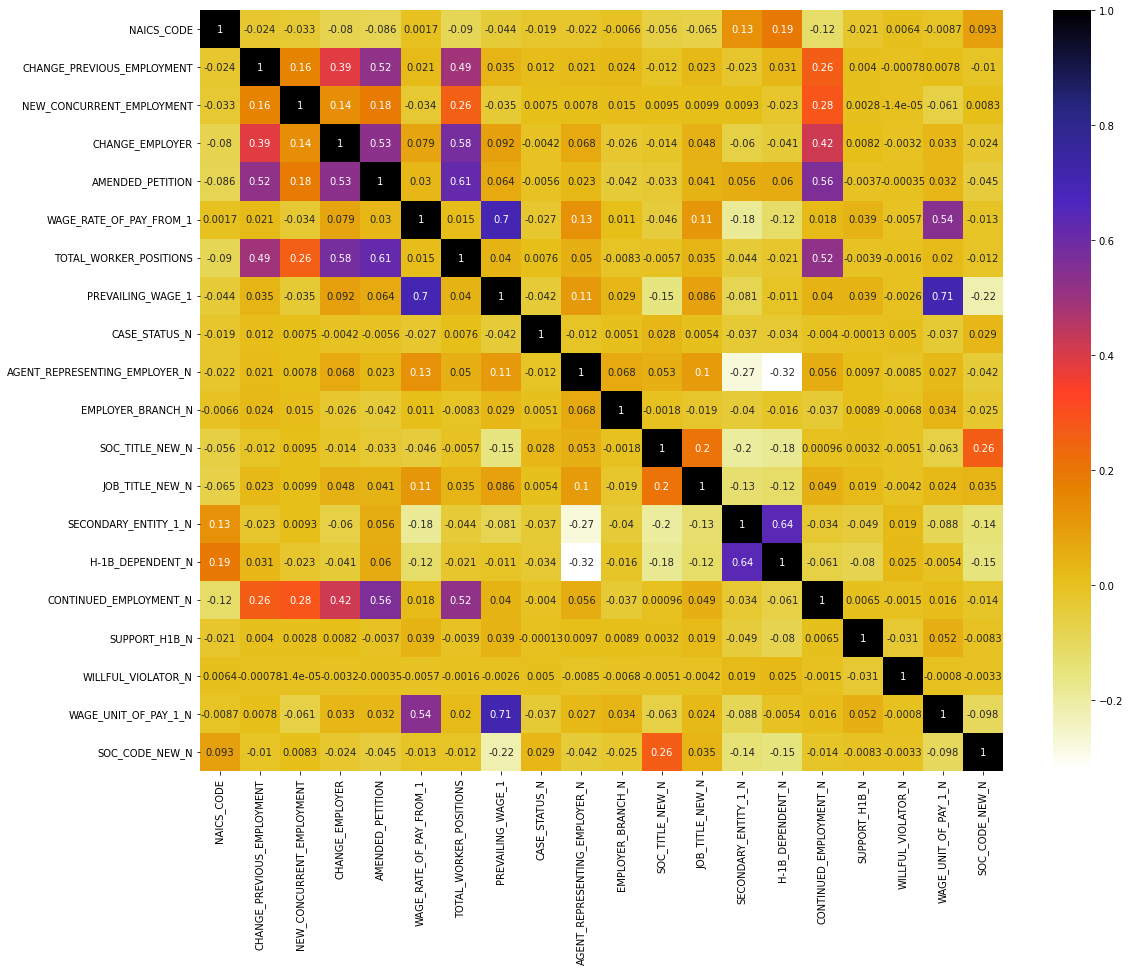

In [73]:
plt.figure(figsize=(18, 14))
correl = H1B_visa.corr()
sns.heatmap(correl, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()